* `CustomerID`: Unique ID for each customer
* `Gender`: Randomly 'Male' or 'Female'
* `Age`: Random int between 18-65
* `Tenure`: Random tenure between 0-5 years
* `Balance`: Random float centered around $5000
* `Churn`: Random binary target 0 or 1 with 70% retaining customers

## Importing Necessary Libraries

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

col_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [206]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

print('Setup Complete!')

Setup Complete!


In [207]:
## Loading the data

cus_df = pd.read_csv('E:\Customer_Churn_Prediction\Dataset\Churn_Modelling.csv')
cus_df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8906,8907,15797065,Goloubev,613,Spain,Female,32,0,0.00,2,0,1,126675.62,0
5596,5597,15796957,Iadanza,597,Spain,Male,35,9,0.00,3,0,1,73181.39,1
5464,5465,15795540,Reye,556,France,Female,36,2,134208.22,1,0,1,177670.57,0
3104,3105,15654230,Miller,526,Germany,Male,31,5,145537.21,1,1,0,132404.64,0
2194,2195,15710161,Ko,850,France,Female,34,2,0.00,2,1,1,171706.66,0
6845,6846,15734085,Crocker,465,Germany,Male,24,5,117154.90,1,1,1,127744.02,0
3455,3456,15580988,Odell,842,France,Male,29,8,0.00,2,1,1,123437.05,0
4820,4821,15694209,Fanucci,484,France,Female,32,3,0.00,2,1,1,139390.99,0
4560,4561,15694518,Kodilinyechukwu,624,Spain,Female,36,0,0.00,2,1,0,111605.90,0
2328,2329,15664204,Meany,706,Spain,Male,29,2,0.00,2,1,1,18255.51,0


In [208]:
cus_df.shape

(10000, 14)

In [209]:
## Checking for null values
cus_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [210]:
cus_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [211]:
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [212]:
cus_df.drop(columns=['CustomerId','RowNumber','Surname'], axis=1, inplace=True)

In [213]:
cus_df.rename(columns={'Exited':'Target'}, inplace=True)

In [214]:
cus_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Target
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


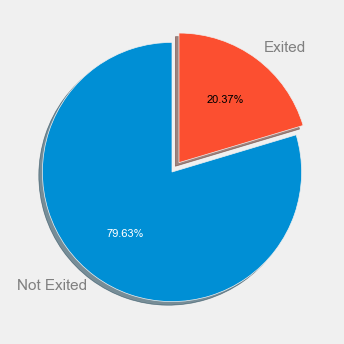

In [215]:
values = cus_df.Target.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize=(4,4), dpi=100)

explode = (0, 0.09)

patches, text, autotexts = ax.pie(values, labels=labels,
                                  autopct='%1.2f%%', shadow=True,
                                  startangle=90, explode=explode)

plt.setp(text, color='grey')
plt.setp(autotexts, size=8, color='white')
autotexts[1].set_color('black')
plt.show()


* 30% of customers have churned and 70% haven't.

In [216]:
cus_df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

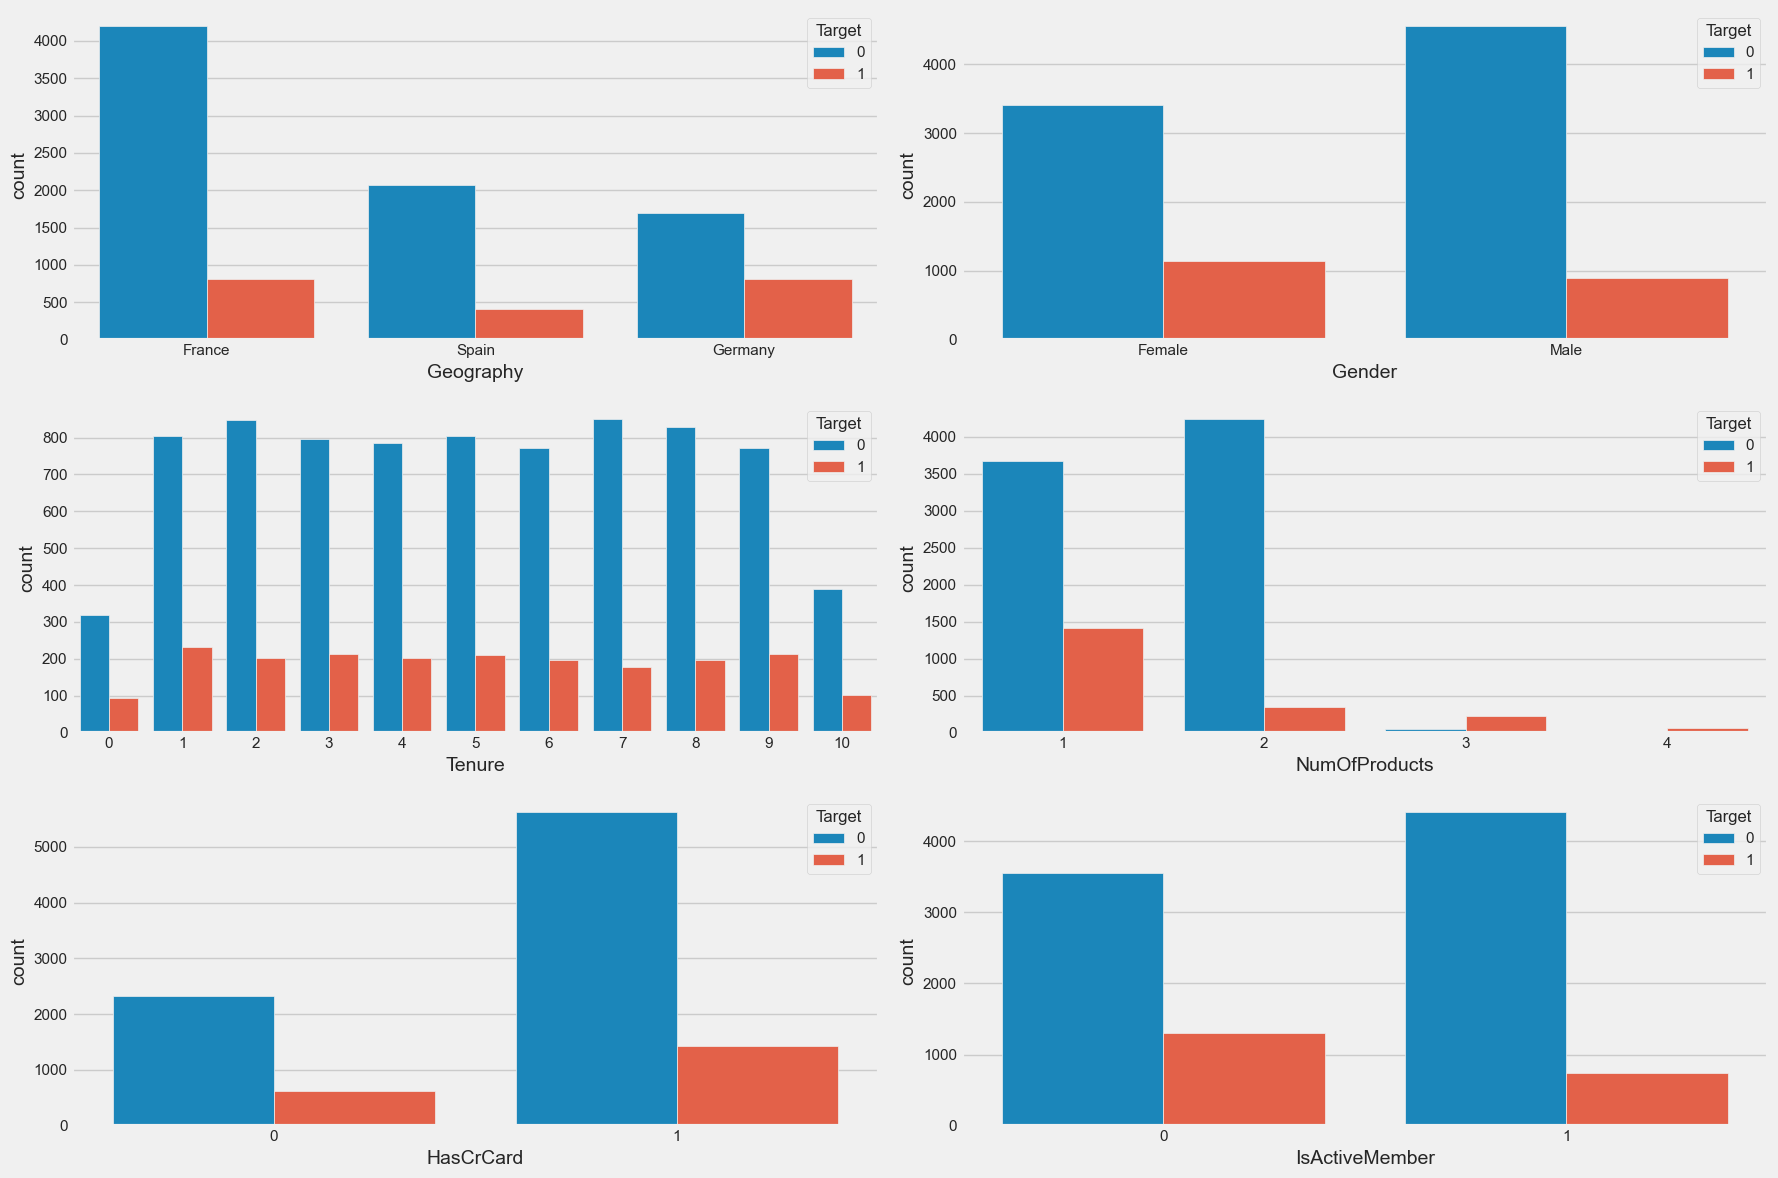

In [217]:
## Visualizing categorical variables

fig, ax = plt.subplots(3,2,figsize=(18,12))

sns.countplot(x='Geography', hue = 'Target', data = cus_df, ax = ax[0,0])
sns.countplot(x='Gender', hue = 'Target', data = cus_df, ax = ax[0,1])
sns.countplot(x='Tenure', hue = 'Target', data = cus_df, ax = ax[1,0])
sns.countplot(x='NumOfProducts', hue = 'Target', data = cus_df, ax = ax[1,1])
sns.countplot(x='HasCrCard', hue = 'Target', data = cus_df, ax = ax[2,0])
sns.countplot(x='IsActiveMember', hue = 'Target', data = cus_df, ax = ax[2,1])

plt.tight_layout()
plt.show()


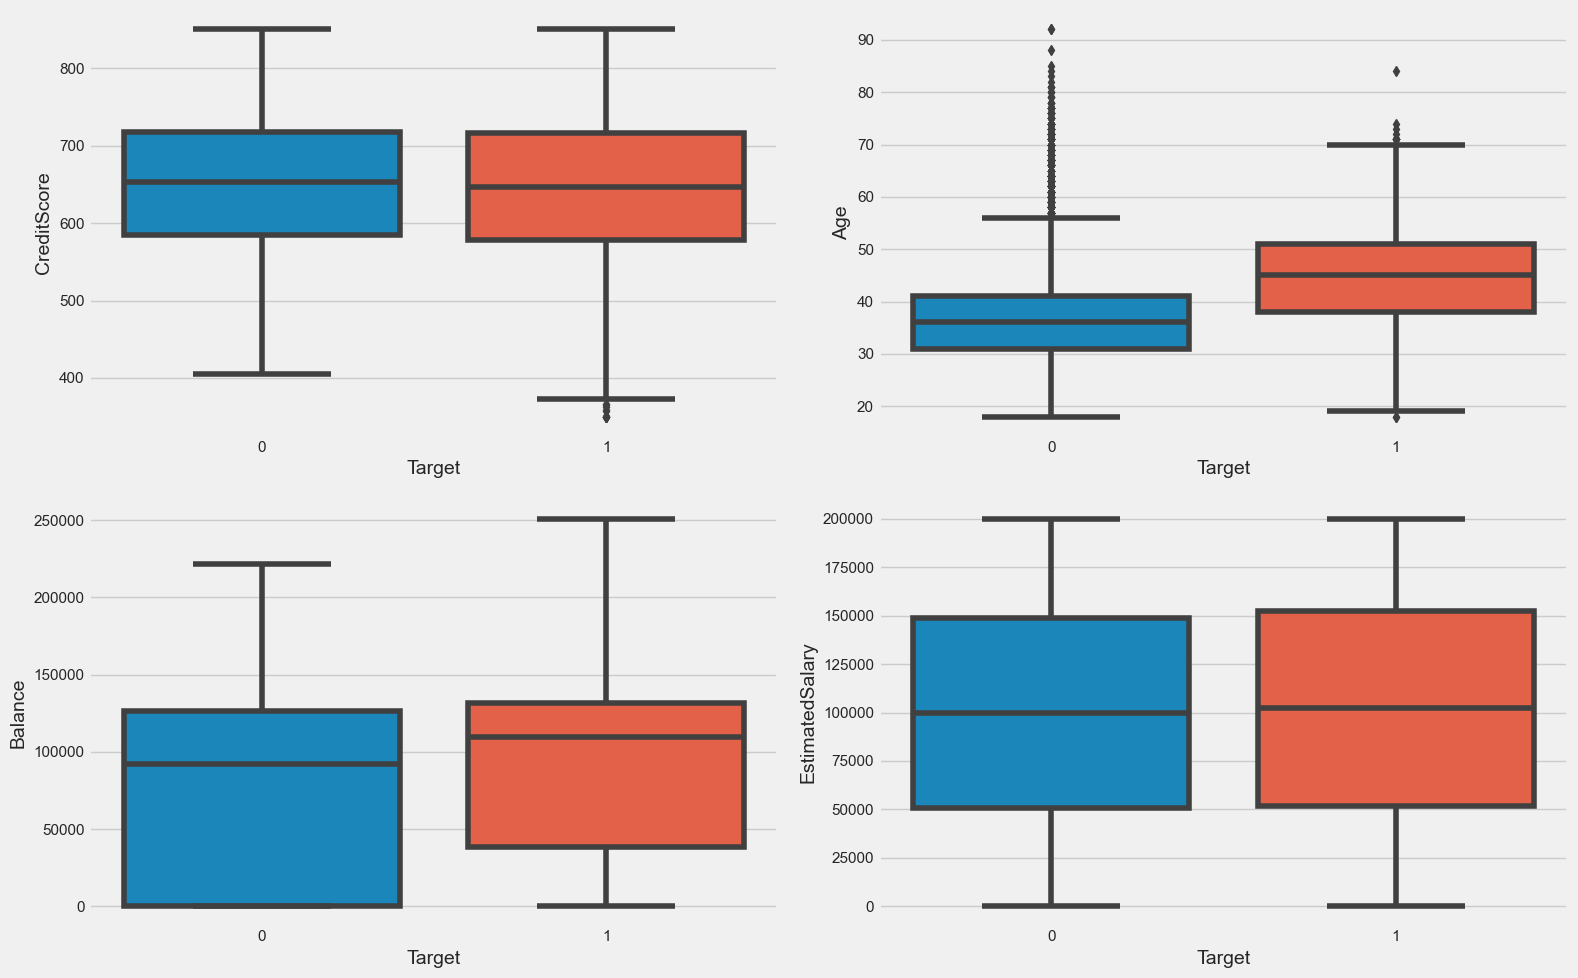

In [218]:
## Visualizing continuous variables

fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Target', y = 'CreditScore', data = cus_df, ax = ax[0][0])
sns.boxplot(x = 'Target', y = 'Age', data = cus_df, ax = ax[0][1])
sns.boxplot(x = 'Target', y = 'Balance', data = cus_df, ax = ax[1][0])
sns.boxplot(x = 'Target', y = 'EstimatedSalary', data = cus_df, ax = ax[1][1])

plt.tight_layout()
plt.show()

## Heatmap

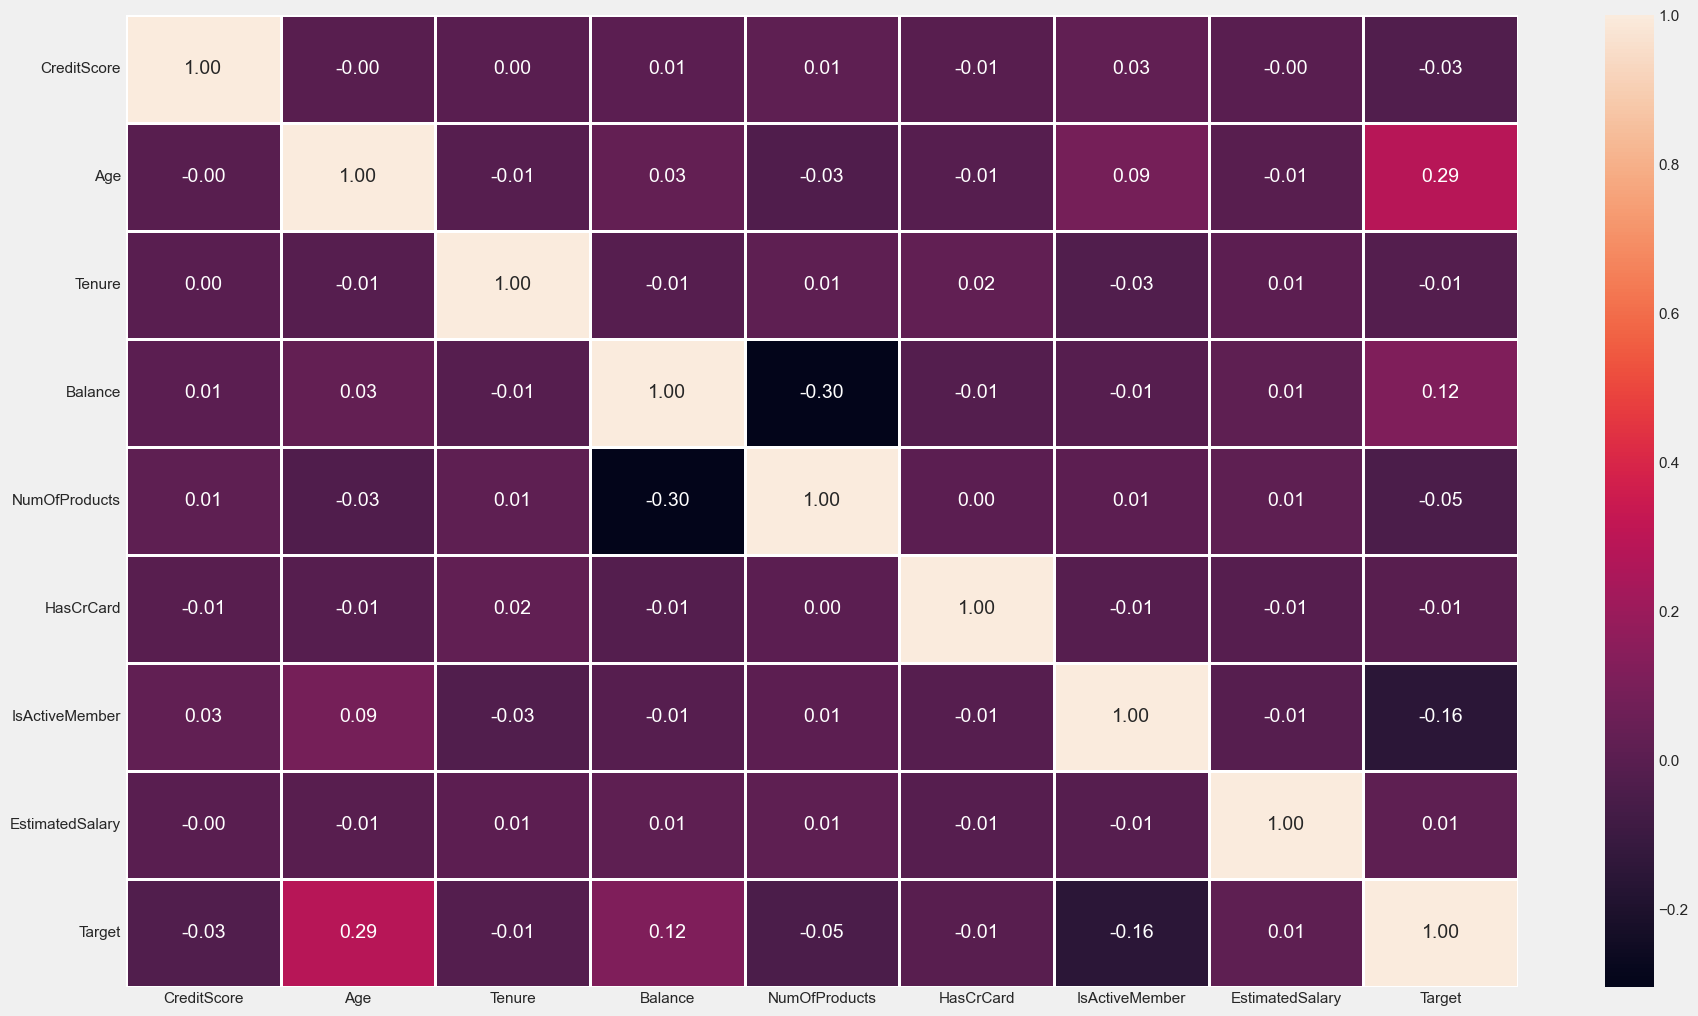

In [219]:
plt.figure(figsize=(20,12))

corr = cus_df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = '.2f')
plt.show()

In [220]:
print(f'{cus_df.Geography.value_counts()}\n\n{cus_df.Gender.value_counts()}')

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64


In [221]:
## Encoding categorical variables

cus_df['Geography'] = cus_df['Geography'].map({'France':0,'Germany':1, 'Spain':2})

cus_df.Gender = cus_df.Gender.map({'Male':0, 'Female':1})

In [222]:
cus_df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Target
6131,686,0,0,60,9,0.00,3,1,1,75246.21,1
1377,768,2,1,44,6,60603.40,1,1,1,178045.97,0
2859,551,2,0,32,4,0.00,2,1,0,53420.53,0
9979,677,0,1,58,1,90022.85,1,0,1,2988.28,0
833,634,1,0,37,3,111432.77,2,1,1,167032.49,0
3210,606,2,1,53,1,109330.06,1,1,1,75860.01,0
1199,645,0,0,41,7,0.00,1,0,1,28667.56,0
3710,645,0,0,30,1,125739.26,1,1,1,193441.23,0
2622,627,1,0,27,0,185267.45,2,1,1,77027.34,0
6335,507,0,1,35,1,0.00,2,0,0,92131.54,0
